In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
# Read in the data

df = pd.read_csv('movies.csv')

In [6]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Checking for missing data --> Trying to check for percentage of data misisng out of total dataset

for col in df.columns:
  percent_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
# Checking for data types of our columns

df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [10]:
# Change data type of columns

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [14]:
#Creating correct year column

df['year_correct'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [15]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [16]:
pd.set_option('display.max_rows', None)

In [17]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
6420,erbp
3776,double A Films
524,Zupnik-Curtis Enterprises
3330,Zucker Brothers Productions
146,Zoetrope Studios


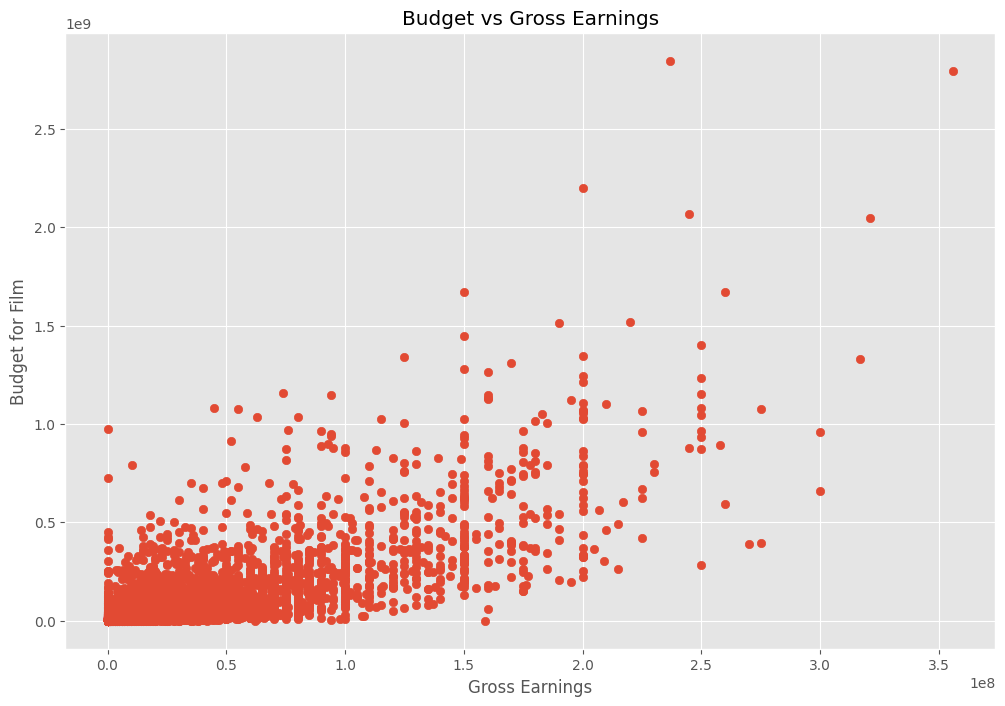

In [22]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


<Axes: xlabel='budget', ylabel='gross'>

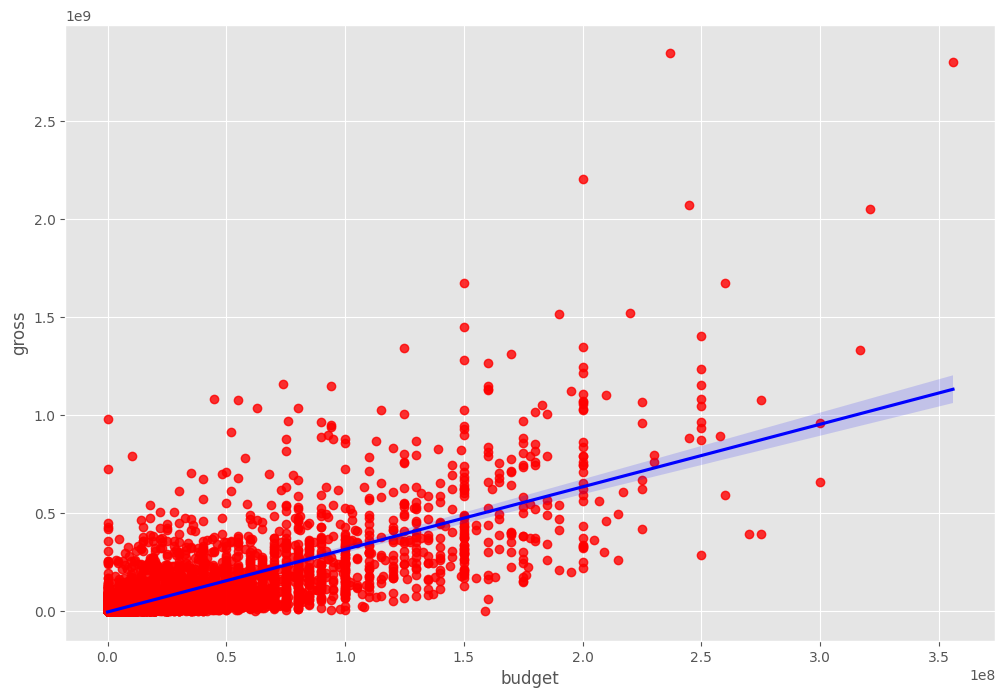

In [24]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [32]:
# Looking at correlation

df.corr(numeric_only=True, method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


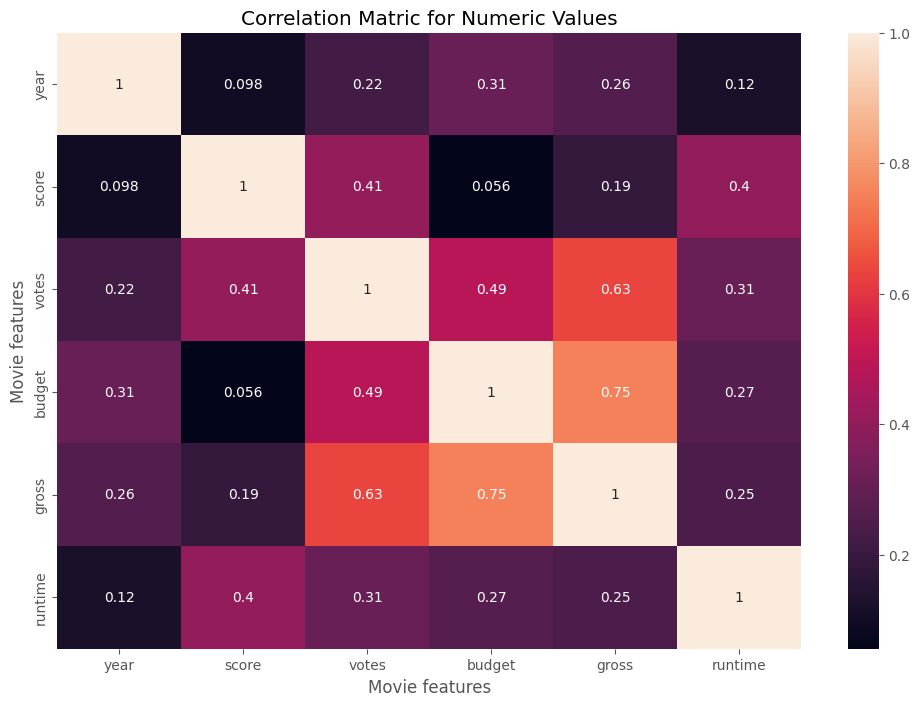

In [30]:
correlation_matrix = df.corr(numeric_only=True,method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Values')

plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [33]:
# Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [34]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

Output hidden; open in https://colab.research.google.com to view.

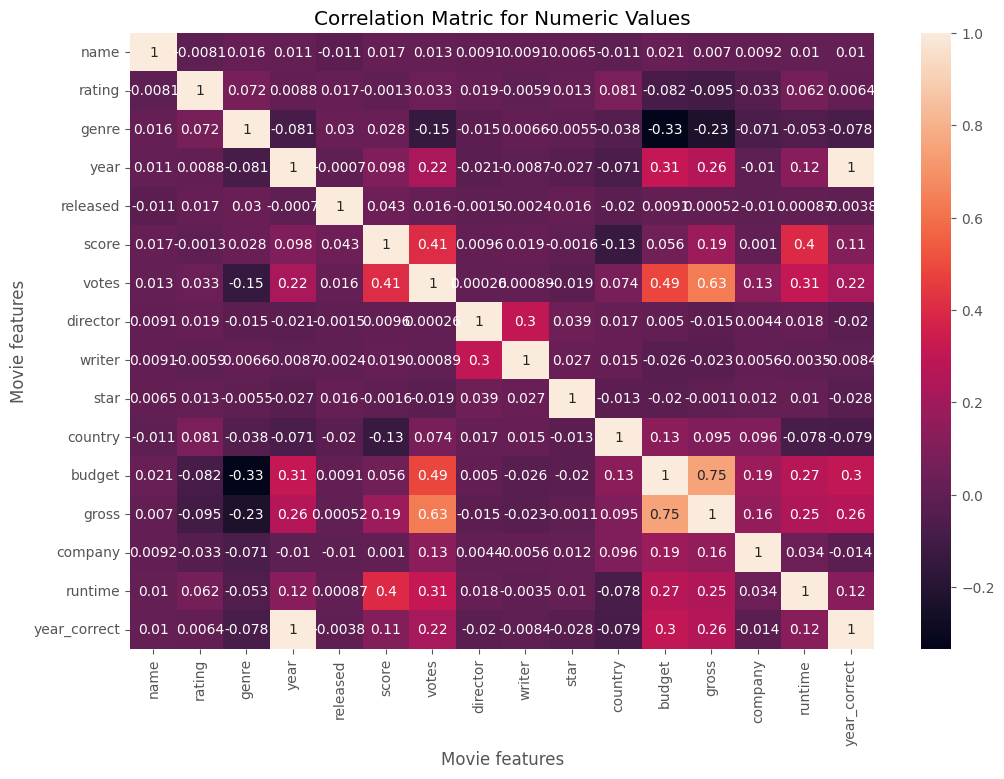

In [35]:
correlation_matrix = df_numerized.corr(numeric_only=True,method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Values')

plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [36]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct    0.010225
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star            0.013405
              country         0.081244
              budget         -0.081939
              gross          -0.095450
              company        -0.032943
              runtime         0.062145
              year_correct    0.006403
genre         name            0.016355
              rating          0.072423
              genre           1.000000
              year           -0.081261
              released        0.029822
              score           0.027965
              votes          -0.145307
              director       -0.015258
              writer          0.006567
              star           -0.005477
              country        -0.037615
              budget         -0.334021
              gross          -0.234297
              company        -0.071067
              runtime        -0.052711
              year_correct   -0.078210
year          name            0.011453
              rating          0.008779
              genre          -0.081261
              year            1.000000
              released       -0.000695
              score           0.097995
              votes           0.222945
              director       -0.020795
              writer         -0.008656
              star           -0.027242
              country        -0.070938
              budget          0.309212
              gross           0.261900
              company        -0.010431
              runtime         0.120811
              year_correct    0.996397
released      name           -0.011311
              rating          0.016613
              genre           0.029822
              year           -0.000695
              released        1.000000
              score           0.042788
              votes           0.016097
              director       -0.001478
              writer         -0.002404
              star            0.015777
              country        -0.020427
              budget          0.009145
              gross           0.000519
              company        -0.010474
              runtime         0.000868
              year_correct   -0.003775
score         name            0.017097
              rating         -0.001314
              genre           0.027965
              year            0.097995
              released        0.042788
              score           1.000000
              votes           0.409182
              director        0.009559
              writer          0.019416
              star           -0.001609
              country        -0.133348
              budget          0.055665
              gross           0.186392
              company         0.001030
              runtime         0.399451
              year_correct    0.106295
votes         name            0.013088
              rating          0.033225
              genre          -0.145307
              year            0.222945
              released        0.016097
              score           0.409182
              votes   

In [38]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
country       year_correct   -0.079009
year_correct  country        -0.079009
runtime       country        -0.078412
country       runtime        -0.078412
year_correct  genre          -0.078210
genre         year_correct   -0.078210
              company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
runtime       genre          -0.052711
genre         runtime        -0.052711
country       genre          -0.037615
genre         country        -0.037615
rating        company        -0.032943
company       rating         -0.032943
year_correct  star           -0.027606
star          year_correct   -0.027606
              year           -0.027242
year          star           -0.027242
writer        budget         -0.025911
budget        writer         -0.025911
writer        gross          -0.022997
gross         writer         -0.022997
director      year           -0.020795
year          director       -0.020795
released      country        -0.020427
country       released       -0.020427
director      year_correct   -0.020385
year_correct  director       -0.020385
star          budget         -0.019952
budget        star           -0.019952
votes         star           -0.019282
star          votes          -0.019282
director      genre          -0.015258
genre         director       -0.015258
director      gross          -0.014916
gross         director       -0.014916
company       year_correct   -0.014144
year_correct  company        -0.014144
star          country        -0.012998
country       star           -0.012998
released      name           -0.011311
name          released       -0.011311
country       name           -0.010737
name          country        -0.010737
released      company        -0.010474
company       released       -0.010474
year          company        -0.010431
company       year           -0.010431
year          writer         -0.008656
writer        year           -0.008656
              year_correct   -0.008391
year_correct  writer         -0.008391
name          rating         -0.008069
rating        name           -0.008069
              writer         -0.005921
writer        rating         -0.005921
star          genre          -0.005477
genre         star           -0.005477
released      year_correct   -0.003775
year_correct  released       -0.003775
runtime       writer         -0.003511
writer        runtime        -0.003511
              released       -0.002404
released      writer         -0.002404
star          score          -0.001609
score         star           -0.001609
released      director       -0.001478
director      released       -0.001478
score         rating         -0.001314
rating        score          -0.001314
star          gross          -0.001129
gross         star           -0.001129
year          released       -0.000695
released      year           -0.000695
votes         director        0.000260
director      votes           0.000260
gross         released        0.000519
released      gross           0.000519
runtime       released        0.000868
released      runtime         0.000868
writer        votes           0.000892
votes         writer          0.000892
company       score           0.001030
score         company         0.001030
director      company         0.004404
company       director        0.004404
budget        director

In [39]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

,,0
gross,votes,0.632834
votes,gross,0.632834
gross,budget,0.750157
budget,gross,0.750157
year_correct,year,0.996397
year,year_correct,0.996397
name,name,1.000000
company,company,1.000000
gross,gross,1.000000
budget,budget,1.000000
